In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

After going through different MOOCs and lots of  online literature for Machine Learning, I decided to create this kernel.  I will go step by step through developing a prediction model for famous Titanic Dataset. Starting from very basic, that is taught by almost every online machine learning course/tutorial(s).

There are many kernels on Kaggle created by experts in the field, but as someone new to this field initially I was overwhelmed going through them. That's why I decided to go bit by bit.
This kernel is divided into 3 major sections as below. 

<a href="#Machine-Learning-101---Beginner:-Implementing-Textbook-Lesson" target="_self"><span class="toc-section-number">1</span> "Machine Learning 101 - Beginner: Implementing Textbook Lesson"</a>

<a href="#MachineLearning-102---Intermediate-:-Working-on-Feature-Set" target="_self"><span class="toc-section-number">2</span> "MachineLearning 102 - Intermediate : Working on Feature Set"</a>

<a href="#Machine-Learning-103--Advanced:-Aim-Top-10%-on-Leaderboard " target="_self"><span class="toc-section-number">3</span> "Machine Learning 103- Advanced: Aim Top 10% on Leaderboard"</a>


Importing Libraries

In [ ]:
import numpy as np #NumPy is the fundamental package for scientific computing with Python.
import pandas as pd #library written for the Python for data manipulation and analysis. In particular, 
                    #it offers data structures and operations for manipulating numerical tables and time series .
import matplotlib.pyplot as plt #plotting library  and numerical mathematics extends NumPy
import seaborn as sns  #Python data visualization library based on matplotlib.

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Machine Learning 101 - Beginner: Implementing Textbook Lesson

## Step-1 : Importing Datasets
Training data and Test data

Training Data: Training Data is labeled data used to train your machine learning algorithms and increase accuracy. ML model learns by finding paterns, relations among various features of training data.

Test Data: Once developed machine learning model needs to be tested in the real world to measure how accurate its predictions are.

In [ ]:
Train_Master = pd.read_csv('../input/train.csv')
Test_Master = pd.read_csv('../input/test.csv')

## Step-2 : Know Your Data
**Exploring our data sets:**

In [ ]:
print('*** About Training Data ---> \n')
print('Dimensions: {} Rows and {} Columns \n'.format(Train_Master.shape[0],Train_Master.shape[1]))
print('Column names are -> \n{}\n'.format(Train_Master.columns.values))
Train_Master.info()
print('\n\n\n')
print('*** About Test Data ---> \n')
print('Dimensions: {} Rows and {} Columns \n'.format(Test_Master.shape[0],Test_Master.shape[1]))
print('Column names are -> \n{}\n'.format(Test_Master.columns.values))
Test_Master.info()

**Lets find out more about Training Set**

In [ ]:
Train_Master.describe()

## Step-3 : Clean Your Data
**Data Missingness:**

In [ ]:
Train_Master.isnull().sum(axis=0)

Since, the column <code>Cabin</code> has 687/891 values missing. Lets drop this column. However column <code>Age</code> is crucial for our analysis we need to proxy missing values by some method.

In [ ]:
#Lets drop column "Cabin" from training set.
Train_Master.drop('Cabin', axis=1, inplace=True)
#Lets fill null values of Age by mean of column values
Train_Master['Age'] = Train_Master['Age'].fillna(np.mean(Train_Master['Age']))

In [ ]:
# Still we have two null values in column Embarked.
print(Train_Master['Embarked'].describe())
print(Train_Master['Embarked'].mode())
# Replacing null value with most ocurred value seems proper solution.

In [ ]:
Train_Master['Embarked'] = Train_Master['Embarked'].fillna('S')
Train_Master.isnull().sum(axis=0)  # Re-validate Null value count

## Step-4 : Define Model Parameters
**Selecting Prediction Target and Feature Set**

In [ ]:
Train_Master.columns.values

Survived is Output Variable (Prediction target).

Consider numerical data columns as features. (Simplest way to simulate ML excercise). 
Hence, Features will be 

    Pclass	
    Age	
    SibSp	
    Parch	
    Fare
Since passangerId is inconsequential for building model. It is just another Index on our data. Hence, exclude it from feature set.

In [ ]:
Features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
y = Train_Master.Survived
X = Train_Master[Features]

In [ ]:
y.head()

In [ ]:
X.head()

In [ ]:
X.describe()

Split data into training and validation data

In [ ]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state =1,test_size=0.30)

## Step-5 : Fit Your Model, Predict & Know accuracy on Validation Set
Since this is classification problem , Start by building decision tree model for prediction.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ML_101_DTC = DecisionTreeClassifier(random_state=1)
ML_101_DTC.fit(train_X, train_y)
pred_ML_101_DTC = ML_101_DTC.predict(val_X)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(val_y,pred_ML_101_DTC))
print(classification_report(val_y, pred_ML_101_DTC))
print(accuracy_score(val_y, pred_ML_101_DTC))

Not so impressive result. Try some other models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ML_101_RFC = RandomForestClassifier(random_state=1)
ML_101_RFC.fit(train_X, train_y)
pred_ML_101_RFC = ML_101_RFC.predict(val_X)

print(confusion_matrix(val_y,pred_ML_101_RFC))
print(classification_report(val_y, pred_ML_101_RFC))
print(accuracy_score(val_y, pred_ML_101_RFC))

Even this is not much of progress. But let's stop here for this section. This can be definitely improved if other features like Sex, Embark, Name arec considered for building model.

## Step-6 : Submitting Result
Lets fit <code>RandomForestClassifer</code> results for Test data and submit.

In [ ]:
#For test data test_X will be Test_Master[Features]
#But Null values will give error for predict function.

print(Test_Master[Features].isnull().sum())
# Fix Age as we did for Training Set and Fare to be filled with median of Fare
Test_Master['Age'] = Test_Master['Age'].fillna(np.mean(Test_Master['Age']))
Test_Master['Fare'] = Test_Master['Fare'].fillna(Test_Master['Fare'].median())

pred_ML_101_sub = ML_101_RFC.predict(Test_Master[Features])


#test_ids = Test_Master.loc[:, 'PassengerId']
#my_submission = pd.DataFrame(data={'PassengerId':test_ids, 'Survived':pred_ML_101_sub})

#print(my_submission['Survived'].value_counts())

#Export Results to CSV
# my_submission.to_csv('submission.csv', index = False)   ---Exporting csv from Next Section

**Current Accuracy : 65% & LeaderBoard Standing : Top 96% . ** 

# MachineLearning 102 - Intermediate : Working on Feature Set

#### Want to know more about Titanic
I found this really cool website.

https://www.encyclopedia-titanica.org/

https://www.encyclopedia-titanica.org/titanic-deckplans/profile.html


In [ ]:
Train_Master = pd.read_csv('../input/train.csv')
Test_Master = pd.read_csv('../input/test.csv')
Train_Master.sample(5)

<html>
	<head>
		<meta charset="UTF-8">
			<title>Excel To HTML using codebeautify.org</title>
		</head>
		<body>
			<b>
				<u>What each column in data represents</u> 
			</b>
			<hr>
				<table cellspacing=0 border=1>
					<tr>
						<td style=min-width:50px>Column Name</td>
						<td style=min-width:50px>Description</td>
					</tr>
					<tr>
						<td style=min-width:50px>Survived</td>
						<td style=min-width:50px>1 = Survived , 0 = Died</td>
					</tr>
					<tr>
						<td style=min-width:50px>Pclass</td>
						<td style=min-width:50px>Passenger’s class</td>
					</tr>
					<tr>
						<td style=min-width:50px>Name</td>
						<td style=min-width:50px>Passenger’s name</td>
					</tr>
					<tr>
						<td style=min-width:50px>Sex</td>
						<td style=min-width:50px>Passenger’s sex</td>
					</tr>
					<tr>
						<td style=min-width:50px>Age</td>
						<td style=min-width:50px>Passenger’s age</td>
					</tr>
					<tr>
						<td style=min-width:50px>SibSp</td>
						<td style=min-width:50px>Number of siblings/spouses aboard</td>
					</tr>
					<tr>
						<td style=min-width:50px>Parch</td>
						<td style=min-width:50px>Number of parents/children aboard</td>
					</tr>
					<tr>
						<td style=min-width:50px>Ticket</td>
						<td style=min-width:50px>Ticket number</td>
					</tr>
					<tr>
						<td style=min-width:50px>Fare</td>
						<td style=min-width:50px>Fare</td>
					</tr>
					<tr>
						<td style=min-width:50px>Cabin</td>
						<td style=min-width:50px>Cabin</td>
					</tr>
					<tr>
						<td style=min-width:50px>Embarked</td>
						<td style=min-width:50px>Port from where passenger embarked</td>
					</tr>
				</table>
				<hr>
				</body>
			</html>

In [ ]:
print(Train_Master.info())
print('*-*'*25)
print(Train_Master.describe())

Let's check completeness of our Train and Test data

In [ ]:
fig, ax  = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.heatmap(data=Train_Master.isnull(),cbar=False,yticklabels=False,cmap='cividis', ax=ax[0])
ax[0].set_title('Data Missingness for Training Data',fontsize=16)
sns.heatmap(data=Test_Master.isnull(),cbar=False,yticklabels=False, cmap='cividis',ax=ax[1])
ax[1].set_title('Data Missingness for Test Data',fontsize=16)
plt.show()

**Training Data:**
Age, Cabin, Embarked are missing

**Test Data: **Age, Fare and Cabin are missing.

There seem to be huge percentage of data missing from Cabin column.

## Working with missing data

### Age

In [ ]:
# Age
print('Total No of rows in training set: {} \n'.format(len(Train_Master)))
print('Total No of  rows  in  test  set: {}\n \n '.format(len(Test_Master)))

per_nan_age_train = ((Train_Master['Age'].isnull().sum())*100)/(len(Train_Master))
per_nan_age_test  = ((Test_Master['Age'].isnull().sum())*100)/(len(Test_Master))

print('% of missing rows in training set: {0:0.2f} \n'.format(per_nan_age_train))
print('% of missing  rows  in  test  set: {0:0.2f} \n'.format(per_nan_age_test))

** Selecting best method of imputation**

Lets first check out Age distribution across full dataset.

In [ ]:
Titanic_Master = Train_Master.append(Test_Master)

In [ ]:
age_data = Train_Master['Age'].dropna().append(Test_Master['Age'].dropna())
sns.distplot(age_data,bins = 50,color='blue')
plt.show()

In [ ]:
Train_Master.corr()

In [ ]:
sns.heatmap(Train_Master.corr(), cmap='rainbow', annot=True,cbar=False,linewidths=1, linecolor='black')
plt.show()

'Age' seem to be significantly correlated with <code>'Pclass', 'SibSp', 'Parch'</code> and weakly correlated with <code>'Fare'</code>. Instead of dealing with<code> 'SipSp'</code> and <code> 'Parch' </code> individually, it seems logical to create<code> 'FamilySize'</code> derived from these two fields and find the correlation with other features.

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=Train_Master)

In [ ]:
sns.scatterplot(x='Fare',y='Age',data=Train_Master,hue='Pclass',palette='rainbow')
plt.show()

In [ ]:
fig, ax  = plt.subplots(1,4)
fig.set_figheight(8)
fig.set_figwidth(20)
sns.scatterplot(y='Age',x='Pclass',data=Train_Master,ax=ax[0])
sns.scatterplot(y='Age',x='Fare',data=Train_Master,ax=ax[1])
sns.scatterplot(y='Age',x='SibSp',data=Train_Master,ax=ax[2])
sns.scatterplot(y='Age',x='Parch',data=Train_Master,ax=ax[3])
plt.show()

Looking at dependancies of <code>Age</code>, I have decided to impute null values with <code>Median</code> values for each <code>Pclass</code>

In [ ]:
Titanic_Master.groupby(['Pclass'])['Age'].median()
Titanic_Master[Titanic_Master.Pclass==1]['Age'].median()

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return Titanic_Master[Titanic_Master.Pclass==1]['Age'].median()
        elif Pclass ==2:
            return Titanic_Master[Titanic_Master.Pclass==2]['Age'].median()
        elif Pclass ==3:
            return Titanic_Master[Titanic_Master.Pclass==3]['Age'].median()
    else:
        return Age

In [ ]:
Train_Master['Age'] = Train_Master[['Age','Pclass']].apply(impute_age,axis=1)
Test_Master['Age'] = Test_Master[['Age','Pclass']].apply(impute_age,axis=1)

### Embarked column in training data

In [ ]:
print(Train_Master['Embarked'].isnull().sum())
sns.countplot(data=Train_Master, x='Embarked')
plt.show()

In [ ]:
# Fill value of most occurred value

Train_Master['Embarked'] = Train_Master['Embarked'].fillna('S')

### Fare column in Test Data

Fare is strongly correlated with 'Pclass' . Lets visulaize how Ticket cost varies for each Passenger Class.

In [ ]:
Test_Master[Test_Master['Fare'].isnull()]

In [ ]:
print('Min. of Fare: {}'.format(Titanic_Master.Fare.min()))
print('Max. of Fare: {}'.format(Titanic_Master.Fare.max()))
print('Average Fare: {}'.format(Titanic_Master.Fare.mean()))

Min Fare is **Zero** ... ** Why? ** Lets have look into these passengers data.

In [ ]:
Train_Master[Train_Master.Fare==0]

I thought these people can be the crew of Titanic, however, their name and the title does not specify any such information. 
But this should be considered in detail.
When looked upon some peculiar titles like **Jonkheer**, it seems that  ticket was complimentary because of his position with the Holland America Line which was part of the International Mercantile Marine. [Jonkheer](https://www.encyclopedia-titanica.org/titanic-victim/johan-george-reuchlin.html) 

In [ ]:
sns.boxplot(x='Pclass', y='Fare', data=Titanic_Master)

Looking at outliers in Class-1, it is obvious that mean of Fare is highly affected with these values. 

In [ ]:
print('Mean of fare for Class-3:',end ='   ')
print(Titanic_Master[Titanic_Master.Pclass==3].Fare.mean())
print('Median of fare for whole dataset:',end ='   ')
print(Titanic_Master.Fare.median())
print('Mean Fare values after removing outliers:',end='   ')
print(Titanic_Master[Titanic_Master.Fare<500]['Fare'].mean())

Both of above values are close to each other. I will choose to go with median value of Fare.

In [ ]:
Test_Master['Fare'] = Test_Master['Fare'].fillna(Titanic_Master.Fare.median())

### Dealing with Cabin data

In [ ]:
# Age
print('Total No of rows in training set: {} \n'.format(len(Train_Master)))
print('Total No of  rows  in  test  set: {}\n \n '.format(len(Test_Master)))
print('-'*100)
per_nan_cabin_train = ((Train_Master['Cabin'].isnull().sum())*100)/(len(Train_Master))
per_nan_cabin_test  = ((Test_Master['Cabin'].isnull().sum())*100)/(len(Test_Master))

print('% of missing rows in training set: {0:0.2f} \n'.format(per_nan_cabin_train))
print('% of missing  rows  in  test  set: {0:0.2f} \n'.format(per_nan_cabin_test))

Looking at missing amount of data from 'Cabin' ... Lets drop column 'Cabin'

In [ ]:
Train_Master.drop('Cabin', axis=1, inplace=True)
Test_Master.drop('Cabin', axis=1, inplace=True)

Final Validation for Null values

In [ ]:
fig, ax  = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.heatmap(data=Train_Master.isnull(),cbar=False,yticklabels=False,cmap='cividis', ax=ax[0])
ax[0].set_title('Data Missingness for Training Data',fontsize=16)
sns.heatmap(data=Test_Master.isnull(),cbar=False,yticklabels=False, cmap='cividis',ax=ax[1])
ax[1].set_title('Data Missingness for Test Data',fontsize=16)
plt.show()

## Let's do some more EDA

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(12)

sns.countplot(x='Pclass',data=Train_Master,ax=ax[0])
sns.countplot(x='Pclass',data=Train_Master, hue='Survived',palette=('red','green'),ax=ax[1])
ax[0].set_title('Passenger Count by Pclass')
ax[1].set_title('Survival Distribution of by Pclass')

sns.factorplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=Train_Master)
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(12)
sns.countplot(x='Sex',data=Train_Master, hue='Survived',palette=('red','green'),ax=ax[1])
ax[1].set_title('Survival Distribution of Male and Female')

sns.countplot(x='Sex',data=Train_Master,ax=ax[0])
ax[0].set_title('Total Number of Male and Female of Titanic')

plt.show()

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(12)
sns.countplot(x='Embarked', hue='Survived',data=Train_Master,palette=('red','green'),ax=ax[1])
ax[0].set_title('Total No Embarked Passengers from given Location')
sns.countplot(x='Embarked',data=Train_Master,ax=ax[0])
ax[1].set_title('Survival Distribution as per Embarked Status')
plt.show()

### Encoding Categorical Variables 

**Available techniques to ressolve categorical variable problem**
* Replacing values
* Encoding labels
* One-Hot encoding
* Binary encoding
* Backward difference encoding
* Miscellaneous features


[**One-Hot encoding**](https://www.datacamp.com/community/tutorials/categorical-data#One-Hot encoding)

   The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.

   There are many libraries out there that support one-hot encoding but the simplest one is using <code>pandas.get_dummies()</code>method.

   This function is named this way because it creates dummy/indicator variables (1 or 0). There are mainly three arguments important here, the first one is the DataFrame you want to encode on, second being the columns argument which lets you specify the columns you want to do encoding on, and third, the prefix argument which lets you specify the prefix for the new columns that will be created after  encoding.

In [ ]:
Train_Master = pd.get_dummies(Train_Master, columns=['Sex','Pclass', 'Embarked'], drop_first=True)
Train_Master.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

test_ids = Test_Master.loc[:, 'PassengerId']
Test_Master = pd.get_dummies(Test_Master, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
Test_Master.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
Train_Master.head()

Missed manipulation of columns <code>SibSp</code>, <code>Parch</code>.
Let's create new feature <code>FamilySize</code> derived from these two.

In [ ]:
Train_Master['FamilySize'] = Train_Master['SibSp'] + Train_Master['Parch']
Test_Master['FamilySize'] = Test_Master['SibSp'] + Test_Master['Parch']

Now we can drop <code>SibSp</code> and <code>Parch</code>.

In [ ]:
Train_Master.drop(columns=['SibSp','Parch'], axis=1, inplace =True)
Test_Master.drop(columns=['SibSp','Parch'], axis=1, inplace =True)

## Predictive Modeling

### Split Train and test Data


In [ ]:
y = Train_Master.Survived
X = Train_Master.drop('Survived', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

train_X, val_X, train_y, val_y = train_test_split(X,y,random_state =1,test_size=0.30)

### Choosing the right estimator
![SkLearn](http://scikit-learn.org/stable/_static/ml_map.png)

**DecisionTreeClassifier**

In [ ]:
ML_102_DTC = DecisionTreeClassifier(random_state=1)
ML_102_DTC.fit(train_X, train_y)
pred_ML_102_DTC = ML_102_DTC.predict(val_X)

print(confusion_matrix(val_y,pred_ML_102_DTC))
print(classification_report(val_y, pred_ML_102_DTC))
print(accuracy_score(val_y, pred_ML_102_DTC))

**RandomForestClassifier**

In [ ]:
ML_102_RFC = RandomForestClassifier(random_state=1,n_estimators =300)
ML_102_RFC.fit(train_X, train_y)
pred_ML_102_RFC = ML_102_RFC.predict(val_X)

print(confusion_matrix(val_y,pred_ML_102_RFC))
print(classification_report(val_y, pred_ML_102_RFC))
print(accuracy_score(val_y, pred_ML_102_RFC))

**KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
ML_102_KNN = KNeighborsClassifier(n_neighbors = 3)
ML_102_KNN.fit(train_X, train_y)
pred_ML_102_KNN = ML_102_KNN.predict(val_X)

print(confusion_matrix(val_y,pred_ML_102_KNN))
print(classification_report(val_y, pred_ML_102_KNN))
print(accuracy_score(val_y, pred_ML_102_KNN))

**SVC**

In [ ]:
ML_102_SVC = SVC(probability=True,random_state=1)
ML_102_SVC.fit(train_X, train_y)
pred_ML_102_SVC = ML_102_SVC.predict(val_X)

print(confusion_matrix(val_y,pred_ML_102_SVC))
print(classification_report(val_y, pred_ML_102_SVC))
print(accuracy_score(val_y, pred_ML_102_SVC))

Lets try to find out best parameters for SVC using GridSearch

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000,10000],'gamma':[1,0.1,0.01,0.001,0.0001,0.00001]}
grid = GridSearchCV(SVC(), param_grid,verbose=3)
grid.fit(train_X,train_y)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
pred_ML_102_SVC_grid = grid.predict(val_X)
print(confusion_matrix(val_y,pred_ML_102_SVC_grid))
print(classification_report(val_y, pred_ML_102_SVC_grid))
print(accuracy_score(val_y, pred_ML_102_SVC_grid))

<code>SVC</code> seems to be working best for now. I have improved accuracy from 65 to 76.86 % by doing some simple manipulations with the feature set.
Still there is lot space for improvement, Features like <code> 'Name', 'Cabin', 'Ticket' </code>can be used for optimization with some advanced feature engineering. 

In [ ]:
## Submitting Results of RFC....

#pred_ML_102_sub = grid.predict(Test_Master)

#my_submission = pd.DataFrame(data={'PassengerId':test_ids, 'Survived':pred_ML_102_sub})

#print(my_submission['Survived'].value_counts())

#Export Results to CSV
#my_submission.to_csv('submission.csv', index = False)

**Current LeaderBoard Staning : Top 49% . That's great jump. At the end of previous section it was 96%. So looks like so far we are going in right direction.** 

# Machine Learning 103- Advanced: Aim Top 10% on Leaderboard 

Let's first finish some routine tasks before diving deeper. 

In [ ]:
#Import Data
Train_Master = pd.read_csv('../input/train.csv')
Test_Master = pd.read_csv('../input/test.csv')

#Creating temperory dataset by appending Test set to Training Set
#https://pandas.pydata.org/pandas-docs/stable/merging.html
Titanic_Master = Train_Master.append(Test_Master)

#Impute Age - helper function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return Titanic_Master[Titanic_Master.Pclass==1]['Age'].median()
        elif Pclass ==2:
            return Titanic_Master[Titanic_Master.Pclass==2]['Age'].median()
        elif Pclass ==3:
            return Titanic_Master[Titanic_Master.Pclass==3]['Age'].median()
    else:
        return Age
#Imputing Age
#Train_Master['Age'] = Train_Master[['Age','Pclass']].apply(impute_age,axis=1)
#Test_Master['Age'] = Test_Master[['Age','Pclass']].apply(impute_age,axis=1)
# commenting code for Age imputation, since later stages it was found that Age can be well estimated from Title of Person.
#Impute Embark
Train_Master['Embarked'] = Train_Master['Embarked'].fillna('S')
#Impute Fare
Test_Master['Fare'] = Test_Master['Fare'].fillna(Titanic_Master.Fare.median())

In [ ]:
fig, ax  = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.heatmap(data=Train_Master.isnull(),cbar=False,yticklabels=False,cmap='cividis', ax=ax[0])
ax[0].set_title('Data Missingness for Training Data',fontsize=16)
sns.heatmap(data=Test_Master.isnull(),cbar=False,yticklabels=False, cmap='cividis',ax=ax[1])
ax[1].set_title('Data Missingness for Test Data',fontsize=16)
plt.show()

**Yes...** This time  we are not dropping <code>Cabin</code> column. Lets derive some insights from this column.

Now, The plan is to meet each column one by one, setting some serious meetings. Extract as much as information possible. 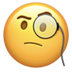

** Let's Start with **
 ### 1. Name 

In [ ]:
Train_Master['Name'].sample(3)

We can extract some crucial information about passengers Age and Social Status from Title.
Lets extract unique titles in our dataset

In [ ]:
#How to split name?
'Strange, Dr. Steven (Doctor Strage)'.split(sep=',')[1].split(sep='.')[0]

In [ ]:
#However Train_Master['Name'] is series. Working text split for Series
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html

#Train_Master['Name'].str.split(pat=",",expand=True)[1].str.split(pat='.',expand=True)[0]
#Lets store title in new column called 'Title'

Train_Master['Title'] =Train_Master['Name'].str.split(pat=",",expand=True)[1].str.split(pat='.',expand=True)[0].str.strip()
Test_Master['Title'] =Test_Master['Name'].str.split(pat=",",expand=True)[1].str.split(pat='.',expand=True)[0].str.strip()

In [ ]:
Titanic_Master['Title'] =Titanic_Master['Name'].str.split(pat=",",expand=True)[1].str.split(pat='.',expand=True)[0].str.strip()
Titanic_Master.head()

Finding Social Standing in the Title... 

The word [lady](https://en.wikipedia.org/wiki/Lady) is a term of respect for a woman, the equivalent of gentleman. Once used to describe only women of a high social class or status, now it may refer to any adult woman. ...Source[Wikpedia]

In [ ]:
#Objective is to find out if there is relation between Title vs "Social Status & Age of Person".
fig, ax  = plt.subplots(2,1)
fig.set_figheight(8)
fig.set_figwidth(15)
fig.tight_layout()
sns.countplot(x='Title',data=Titanic_Master,ax=ax[0])
sns.boxplot(x='Title',y ='Age', data=Titanic_Master,ax=ax[1])
plt.show()

Some of these titles are very rarely occuring. Those can be put in seperate category altogether.     
Also it can be seen that for a given <code>Title</code> ,<code>Age</code> spectrum is well defined.    
For example, Master is title for children of age range around 0 to 16 years.
Now we know that Null values in <code>Age</code> can be imputed by predicting those from <code>Title </code>of Person.

How to use  <code>Name</code>  as feature in prediction model.
Let's create dummy variables(Feature Encoding) for each of these titles. But for rarely occured values we will mark them all together in one seperate category.

In [ ]:
print(Titanic_Master.Title.value_counts())
print(Titanic_Master.Title.unique())

**Rarely Occuring  Title & Respective Gender: **
<html>
	<head>
		<meta charset="UTF-8">
			<title>Excel To HTML using codebeautify.org</title>
		</head>
		<body>
			<b>
			</b>
			<hr>
				<table cellspacing=0 border=1>
					<tr>
						<td style=min-width:50px>Title</td>
						<td style=min-width:50px>Gender</td>
					</tr>
					<tr>
						<td style=min-width:50px>Mlle </td>
						<td style=min-width:50px>Female</td>
					</tr>
					<tr>
						<td style=min-width:50px>Ms </td>
						<td style=min-width:50px>Female</td>
					</tr>
					<tr>
						<td style=min-width:50px>Major </td>
						<td style=min-width:50px>Male</td>
					</tr>
					<tr>
						<td style=min-width:50px>Dona </td>
						<td style=min-width:50px>Female</td>
					</tr>
					<tr>
						<td style=min-width:50px>the Countess </td>
						<td style=min-width:50px>Female</td>
					</tr>
					<tr>
						<td style=min-width:50px>Sir </td>
						<td style=min-width:50px>Male</td>
					</tr>
					<tr>
						<td style=min-width:50px>Lady </td>
						<td style=min-width:50px>Female</td>
					</tr>
					<tr>
						<td style=min-width:50px>Don </td>
						<td style=min-width:50px>Male</td>
					</tr>
					<tr>
						<td style=min-width:50px>Capt </td>
						<td style=min-width:50px>Male</td>
					</tr>
					<tr>
						<td style=min-width:50px>Jonkheer </td>
						<td style=min-width:50px>Male</td>
					</tr>
					<tr>
						<td style=min-width:50px>Mme </td>
						<td style=min-width:50px>Female</td>
					</tr>
				</table>
				<hr>
				</body>
			</html>

In [ ]:
#Lets create mapping for the titles 
Title_dict = {
  'Mr': 'Mr',
  'Mrs': 'Mrs',
  'Miss': 'Miss',
  'Master': 'Master',
  'Don': 'Others_M',
  'Rev': 'Rev',
  'Dr': 'Dr',
  'Mme': 'Others_F',
  'Ms': 'Others_F',
  'Major': 'Others_M',
  'Lady': 'Others_F',
  'Sir': 'Others_M',
  'Mlle': 'Others_F',
  'Col': 'Others_M',
  'Capt': 'Others_M',
  'the Countess': 'Others_F',
  'Jonkheer': 'Others_M',
  'Dona': 'Others_F',
}

In [ ]:
#Updating Titles as per defined mapping
Train_Master['Title'] = Train_Master['Title'].map(Title_dict)
Test_Master['Title'] = Test_Master['Title'].map(Title_dict)
Titanic_Master['Title'] = Titanic_Master['Title'].map(Title_dict)

In [ ]:
fig, ax  = plt.subplots(2,1)
fig.set_figheight(8)
fig.set_figwidth(12)
fig.tight_layout()
sns.countplot(x='Title',data=Titanic_Master,ax=ax[0])
sns.boxplot(x='Title',y ='Age', data=Titanic_Master,ax=ax[1])
plt.show()

**Encoding Categorical Variable <code>Title</code>**

In [ ]:
#Train_Master = pd.get_dummies(Train_Master, columns=['Title'], drop_first=True)
#Test_Master = pd.get_dummies(Test_Master, columns=['Title'], drop_first=True)
#Train_Master.head()
# Skipping this part since we may need 'Title' to derive other features like 'Age'

### 2. Age

Let's first deal with Null values in <code>Age</code>.
Since we have clear idea that given the title passengers age lies in a particular range.
Will now replace Null age values based on their title.

In [ ]:
Titanic_Master.groupby(['Title'])['Age'].median()

In [ ]:
titles = ['Dr', 'Mr', 'Master','Miss','Mrs','Others_F','Others_M','Rev']
titles

In [ ]:
for title in titles: #['Dr', 'Master','Miss','Mrs','Others_F','Others_M']
    Test_Master.loc[(Test_Master['Title'] == title) & (Test_Master['Age'].isnull()), 'Age'] = Titanic_Master[Titanic_Master['Title'] == title]['Age'].median()
    Train_Master.loc[(Train_Master['Title'] == title) & (Train_Master['Age'].isnull()) , 'Age'] = Titanic_Master[Titanic_Master['Title'] == title]['Age'].median()
print('---'*25)

There are two types of variables you see in machine learning.
    1. Continuous
    2. Discrete (Categorical and Ordinal)
  
 <code>Age</code> here belongs to first type. Machine Learning alsorithms understand second type of variables in a better way compared to first.
 That's why we need be careful while dealing with continuous features. 
 
[** Methods to deal with Continuous Variables**](https://www.analyticsvidhya.com/blog/2015/11/8-ways-deal-continuous-variables-predictive-modeling/)

**Binning The Variable:**
Binning refers to dividing a list of continuous variables into groups. It is done to discover set of patterns in continuous variables, which are difficult to analyze otherwise. Also, bins are easy to analyze and interpret. But, it also leads to loss of information and loss of power. Once the bins are created, the information gets compressed into groups which later affects the final model. Hence, it is advisable to create small bins initially.

This would help in minimal loss of information and produces better results. However, There are cases where small bins doesn’t prove to be helpful. In such cases, you must decide for bin size according to your hypothesis.We should consider distribution of data prior to deciding bin size.

In [ ]:
# Distribution of Age
sns.distplot(Titanic_Master.Age.dropna(), bins=50)

In [ ]:
#Till this point we have gained great insight over data, we can logically decide bins.
# Min_age in our data = 0.92
# Max_age in our data = 80
 
# We have also seen there is relation between <code>Age</code> and <code>Title</code>
#Titanic_Master.dropna().groupby(['Title'])['Age'].describe()
#------------------------------------------------------------------------------------------
Titanic_Master.dropna()['Age'].describe()

In [ ]:
# mapping Age to bin 
#0  = <24
#1  = >24 and  < 36
#2  = >36 and <47
#3  = >47
Train_Master.loc[ Train_Master['Age'] <= 24, 'Age'] = 0
Train_Master.loc[(Train_Master['Age'] > 24) & (Train_Master['Age'] <= 36), 'Age'] = 1
Train_Master.loc[(Train_Master['Age'] > 36) & (Train_Master['Age'] <= 47), 'Age'] = 2
Train_Master.loc[ Train_Master['Age'] > 47 , 'Age'] = 3
Train_Master['Age'] = Train_Master['Age'].astype(int)

Test_Master.loc[ Test_Master['Age'] <= 24, 'Age'] = 0
Test_Master.loc[(Test_Master['Age'] > 24) & (Test_Master['Age'] <= 36), 'Age'] = 1
Test_Master.loc[(Test_Master['Age'] > 36) & (Test_Master['Age'] <= 47), 'Age'] = 2
Test_Master.loc[ Test_Master['Age'] > 47 , 'Age'] = 3
Test_Master['Age'] = Test_Master['Age'].astype(int)


Now we can treat Age as Categorical feature. Lets to variable encoding for age as we did earlier for other categorical variables.

In [ ]:
Train_Master = pd.get_dummies(Train_Master, columns=['Title'])
Test_Master = pd.get_dummies(Test_Master, columns=['Title'])
Train_Master = pd.get_dummies(Train_Master, columns=['Age'])
Test_Master = pd.get_dummies(Test_Master, columns=['Age'])  #, drop_first=True
Test_Master.head()

**3. Fare**

Another continuous  variable in our data is <code>Fare</code>.

In [ ]:
Titanic_Master = Train_Master.append(Test_Master)
Titanic_Master.reset_index(inplace=True, drop=True)
Titanic_Master.Fare.isnull().any()

In [ ]:

median = np.median(Titanic_Master.Fare)
upper_quartile = np.percentile(Titanic_Master.Fare, 75)
lower_quartile = np.percentile(Titanic_Master.Fare, 25)

iqr = upper_quartile - lower_quartile
upper_whisker = Titanic_Master['Fare'][Titanic_Master['Fare']<=upper_quartile+1.5*iqr].max()
lower_whisker = Titanic_Master['Fare'][Titanic_Master['Fare']>=lower_quartile-1.5*iqr].min()


In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(16)
sns.boxplot(y='Fare',data=Titanic_Master, ax=ax[0], color='green')
sns.distplot(Titanic_Master.Fare, bins=100,ax=ax[1])
plt.sca(ax[1])
plt.xticks(np.arange(min(Titanic_Master.Fare), max(Titanic_Master.Fare), 50))
plt.sca(ax[0])
plt.yticks(np.arange(min(Titanic_Master.Fare), max(Titanic_Master.Fare), 50))
fig.tight_layout()
plt.axhline(y=upper_quartile,linewidth=2, color='b', linestyle='--')
plt.axhline(y=upper_whisker,linewidth=2, color='b', linestyle='--')
ax[0].annotate('Upper Whisker', xy=(0,upper_whisker), xytext=(0,upper_whisker))
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(8)
sns.boxplot(y='Fare',data=Titanic_Master[Titanic_Master.Fare<upper_whisker], ax=ax, color='green')
plt.axhline(y=53,linewidth=2, color='b', linestyle='--')
plt.show()
Titanic_Master[Titanic_Master.Fare<=53]['Fare'].describe()

In [ ]:
print('Total No. of  Passengers , where Fare of individual is more than 50 is {}'.format(Titanic_Master[Titanic_Master.Fare>50]['Fare'].count()))
print('Total Fare paid by Passengers , where Fare of individual is more than 50 is {}'.format(Titanic_Master[Titanic_Master.Fare>50]['Fare'].sum()))
print('\n')
print('Total No. of  Passengers , where Fare of individual is less  than 50 is {}'.format(Titanic_Master[Titanic_Master.Fare<=50]['Fare'].count()))
print('Total Fare paid by Passengers , where Fare of individual is less than 50 is {}'.format(Titanic_Master[Titanic_Master.Fare<=50]['Fare'].sum()))

**Those are some crazy numbers, just 240 people paid almost 1.5 times total Fare compared to other 1069 people**    
Grouping by Fare:

    Group - 1 : Fare > 53
    Group - 2 : <=53 and > 24
    Group - 3 : <=24 and > 12.2
    Group - 4 : <=12.2 and > 7.85
    Group - 5 : <= 7.85
   
Let's map each passengers <code>Fare</code> to respective group/bin as we did earlier for <code>Age</code>

In [ ]:
Train_Master.loc[ Train_Master['Fare'] == 0.0 , 'Fare'] = 0
Train_Master.loc[(Train_Master['Fare'] > 0.0) & (Train_Master['Fare'] <= 7.85), 'Fare'] = 1
Train_Master.loc[(Train_Master['Fare'] > 7.85) & (Train_Master['Fare'] <= 12.2), 'Fare'] = 2
Train_Master.loc[(Train_Master['Fare'] > 12.2) & (Train_Master['Fare'] <= 24), 'Fare'] = 3
Train_Master.loc[(Train_Master['Fare'] > 24) & (Train_Master['Fare'] <= 53), 'Fare'] = 4
Train_Master.loc[ Train_Master['Fare'] > 53, 'Fare'] = 5
Train_Master['Fare'] = Train_Master['Fare'].astype(int)

Test_Master.loc[ Test_Master['Fare'] == 0.0 , 'Fare'] = 0
Test_Master.loc[(Test_Master['Fare'] > 0.0) & (Test_Master['Fare'] <= 7.85), 'Fare'] = 1
Test_Master.loc[(Test_Master['Fare'] > 7.85) & (Test_Master['Fare'] <= 12.2), 'Fare'] = 2
Test_Master.loc[(Test_Master['Fare'] > 12.2) & (Test_Master['Fare'] <= 24), 'Fare'] = 3
Test_Master.loc[(Test_Master['Fare'] > 24) & (Test_Master['Fare'] <= 53), 'Fare'] = 4
Test_Master.loc[ Test_Master['Fare'] > 53, 'Fare'] = 5
Test_Master['Fare'] = Test_Master['Fare'].astype(int)

In [ ]:
Train_Master = pd.get_dummies(Train_Master, columns=['Fare'], drop_first=True)
Test_Master = pd.get_dummies(Test_Master, columns=['Fare'], drop_first=True)
Test_Master.head()

**4. Ticket**    
Let's view ticket combined with <code>Pclass</code> and <code>Cabin</code>.
Upon first observation, I found for most of the ticket numbers the first digit of Ticket number is same s <code>Pclass</code> if that passenger.
I want to first verify if that's true.

There are two types of ticket numbers in data.

     A/5 21171 # Starting with some sort of Class indicator (Maybe)
     PC 17599
     113803    #Simple number format ticket numbers.
    
    
If we can find some correlation between <code>Ticket</code> vs <code>Pclass</code> & <code>Cabin</code>.

This information might be very useful . Infact we can fill Null values in <code>Cabin</code> column , if any relation exists.

Let's breakdown <code>Ticket</code> to gain more details.

In [ ]:
Titanic_Master = Train_Master.append(Test_Master)
Titanic_Master.reset_index(inplace=True, drop=True)

In [ ]:
Titanic_Master[['Name','Ticket', 'Pclass', 'Cabin']].head()

In [ ]:
Cabin_t = []
Pclass_t = []

# Split ticket for both type of ticket numbers as mentioned earlier.
# We will create Cabin_t for text extracted from Ticket No
# And Pclass_t for first digit of ticket number.
for i in range(len(Titanic_Master.Ticket.str.split(" ", n = 1))):
        if len(Titanic_Master.Ticket.str.split(" ", n = 1)[i]) == 1:
            Pclass_t.append(Titanic_Master.Ticket.str.slice(0,1)[i])
            #Cabin_t.append(None)
            Cabin_t.append('U')
        elif len(Titanic_Master.Ticket.str.split(" ", n = 1)[i]) == 2:
            Pclass_t.append(Titanic_Master.Ticket.str.split(" ", n = 1)[i][1][0])
            #Cabin_t.append(Titanic_Master.Ticket.str.split(" ", n = 1)[i][0][0])
            Cabin_t.append(Titanic_Master.Ticket.str.split(" ", n = 1)[i][0].replace( '.' , '' ).replace( '/' , '' ))

In [ ]:
Titanic_Master['Cabin_t'] = Cabin_t
Titanic_Master['Pclass_t'] = Pclass_t
Titanic_Master['Cabin_t']= Titanic_Master['Cabin_t'].str.replace('\d+', '')

In [ ]:
Titanic_Master[['Ticket', 'Cabin','Cabin_t','Pclass', 'Pclass_t']].sample(10)

In [ ]:
#Titanic_Master[(~Titanic_Master['Cabin'].isna()) & (~Titanic_Master['Cabin_t'].isna())][['Cabin','Ticket','Cabin_t','Pclass','Embarked']]
Titanic_Master.Cabin_t.unique()

Cabin_t is not much useful as we expected. However, there is information hidden with this variable.   
" SOTONOQ"  , "CASOTON", "STONOQ"  , "SOTONO" these all relate to Southampton. Common know abbreviation for Southampton is SOTON.
 
 "SCParis" must relate to Paris.
 
 But can we process this information in way to get useful output???

In [ ]:
Titanic_Master['Pclass'] = Titanic_Master['Pclass'].astype(str)
Titanic_Master['Pclass_t'] = Titanic_Master['Pclass_t'].astype(str)
fig, ax = plt.subplots(2,2)
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(12)
sns.countplot('Pclass_t',data=Titanic_Master[Titanic_Master.Pclass == Titanic_Master.Pclass_t], ax=ax[0,0])
ax[0,0].set_title('Pclas == Pclass_t')

sns.scatterplot('Pclass', 'Pclass_t',data=Titanic_Master[Titanic_Master.Pclass == Titanic_Master.Pclass_t], ax=ax[0,1])
sns.scatterplot('Pclass', 'Pclass_t', data=Titanic_Master[Titanic_Master.Pclass != Titanic_Master.Pclass_t],ax=ax[1,1])
sns.countplot('Pclass_t',data=Titanic_Master[Titanic_Master.Pclass != Titanic_Master.Pclass_t], ax=ax[1,0])
ax[1,0].set_title('Pclas != Pclass_t')
plt.show()

For majority of <code>Ticket</code> numbers what we expected holds True. But on same side <code>Pclass_t</code> and <code>Pclass</code> are not same for almost 25% of Ticket Numbers. However trend follows for almost 1000 Tickets.

**5. SibSp and ParCh**

In [ ]:
Train_Master['FamilySize'] = Train_Master['SibSp'] + Train_Master['Parch'] + 1
Test_Master['FamilySize'] = Test_Master['SibSp'] + Test_Master['Parch'] + 1
Titanic_Master['FamilySize'] = Titanic_Master['SibSp'] + Titanic_Master['Parch'] + 1

In [ ]:
sns.countplot(x='FamilySize', data=Titanic_Master)
plt.show()

In [ ]:
# 1     : Travelling Alone
# 2,3,4 : Small Family
# >5    : Large Family
#{'1': 1, '2':'2', '3':'2', '4':'2', '5':'3', '6':'3', '7':'3', '8':'3', '11':'3'}
Titanic_Master['FamilySize'] = Titanic_Master['FamilySize'].map({1:'1',2:'2',3:'2',4:'2',5:'3',6:'3',7:'3',8:'3',11:'3'})
Train_Master['FamilySize'] = Train_Master['FamilySize'].map({1:'1',2:'2',3:'2',4:'2',5:'3',6:'3',7:'3',8:'3',11:'3'})
Test_Master['FamilySize'] = Test_Master['FamilySize'].map({1:'1',2:'2',3:'2',4:'2',5:'3',6:'3',7:'3',8:'3',11:'3'})

In [ ]:
Train_Master = pd.get_dummies(Train_Master, columns=['FamilySize']) #drop_first=True
Test_Master = pd.get_dummies(Test_Master, columns=['FamilySize'])

**5. Sex , Pclass and Embarked**

In [ ]:
Train_Master = pd.get_dummies(Train_Master, columns=['Sex'], drop_first=True)
Test_Master = pd.get_dummies(Test_Master, columns=['Sex'], drop_first=True)

Train_Master = pd.get_dummies(Train_Master, columns=['Pclass'], drop_first=True)
Test_Master = pd.get_dummies(Test_Master, columns=['Pclass'], drop_first=True)

Train_Master = pd.get_dummies(Train_Master, columns=['Embarked'], drop_first=True)
Test_Master = pd.get_dummies(Test_Master, columns=['Embarked'], drop_first=True)

In [ ]:
Train_Master['Cabin'].fillna('U', inplace=True)
Test_Master['Cabin'].fillna('U', inplace=True)

Train_Master['Cabin'] = Train_Master['Cabin'].str[0]
Test_Master['Cabin'] = Test_Master['Cabin'].str[0]

Train_Master = pd.get_dummies(Train_Master, columns=['Cabin']) #, drop_first=True
Test_Master = pd.get_dummies(Test_Master, columns=['Cabin'])

Train_Master.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], inplace=True)
Test_Master.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'],inplace=True)
#Train_Master.head()

In [ ]:
#Train_Master.head()
Train_Master.drop(columns=['Title_Rev', 'FamilySize_3', 'Cabin_U','Age_0'], inplace=True)
Test_Master.drop(columns=['Title_Rev', 'FamilySize_3', 'Cabin_U','Age_0'],inplace=True)

In [ ]:
Train_Master.head()

We have reached the point there are no more columns which need preprocessing.
Let's once more analyze correlation matrix for our training set.

In [ ]:
fig, ax = plt.subplots()
fig.tight_layout()
fig.set_figheight(20)
fig.set_figwidth(20)
sns.heatmap(Train_Master.corr(), cbar=False,annot=True, ax=ax,linewidths=1, linecolor='black')
plt.show()

That is too much information to consume. Let's just have look at how these variables are impacting 'Survived' variable.

In [ ]:
Corr = Train_Master.corr().iloc[0].to_frame().reset_index().rename(columns={"index": "Feature", "Survived": "Corr_Coeff"})
fig, ax = plt.subplots()
fig.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(20)
g= sns.barplot('Feature','Corr_Coeff', data=Corr,ax=ax,palette='rainbow')
g.set_xticklabels(labels=xlabels, rotation=45)
plt.show()

In [ ]:
y = Train_Master.Survived
X = Train_Master.drop('Survived', axis=1)

train_X, val_X, train_y, val_y = train_test_split(X,y,random_state =1,test_size=0.30)

ML_103_RFC = RandomForestClassifier(random_state=1,n_estimators =200,max_depth=10)
ML_103_RFC.fit(train_X, train_y)
pred_ML_103_RFC = ML_103_RFC.predict(val_X)

print(confusion_matrix(val_y,pred_ML_103_RFC))
print(classification_report(val_y, pred_ML_103_RFC))
print(accuracy_score(val_y, pred_ML_103_RFC))

Test_Master['Cabin_T'] = 0
pred_ML_103_sub = ML_103_RFC.predict(Test_Master)
my_submission = pd.DataFrame(data={'PassengerId':test_ids, 'Survived':pred_ML_103_sub})

print(my_submission['Survived'].value_counts())

#Export Results to CSV
my_submission.to_csv('submission.csv', index = False)

In [ ]:
ML_103_SVC = SVC(probability=True,random_state=1)
ML_103_SVC.fit(train_X, train_y)
pred_ML_103_SVC = ML_103_SVC.predict(val_X)

print(confusion_matrix(val_y,pred_ML_103_SVC))
print(classification_report(val_y, pred_ML_103_SVC))
print(accuracy_score(val_y, pred_ML_103_SVC))

from sklearn.grid_search import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(), param_grid,verbose=3)
grid.fit(train_X,train_y)

pred_ML_103_SVC_grid = grid.predict(val_X)
print(confusion_matrix(val_y,pred_ML_103_SVC_grid))
print(classification_report(val_y, pred_ML_103_SVC_grid))
print(accuracy_score(val_y, pred_ML_103_SVC_grid))

##===========================================================
from sklearn.ensemble import GradientBoostingClassifier
ML_103_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.95, max_features=15, max_depth = 2, random_state = 0)
ML_103_GBC.fit(train_X, train_y)
pred_ML_103_GBC = ML_103_GBC.predict(val_X)

print(confusion_matrix(val_y,pred_ML_103_GBC))
print(classification_report(val_y, pred_ML_103_GBC))
print(accuracy_score(val_y, pred_ML_103_GBC))
##==================================================
print('BaggingClassifier---')
from sklearn.ensemble import BaggingClassifier
ML_103_BC = BaggingClassifier(max_samples= 0.25, n_estimators= 300, max_features=10)
ML_103_BC.fit(train_X, train_y)
pred_ML_103_BC = ML_103_BC.predict(val_X)

print(confusion_matrix(val_y,pred_ML_103_BC))
print(classification_report(val_y, pred_ML_103_BC))
print(accuracy_score(val_y, pred_ML_103_BC))
print('*-*'*25)
##==================================================

print('Submit Results for Best working model.')
pred_ML_103_sub = ML_103_RFC.predict(Test_Master)
my_submission = pd.DataFrame(data={'PassengerId':test_ids, 'Survived':pred_ML_103_sub})

print(my_submission['Survived'].value_counts())

#Export Results to CSV
my_submission.to_csv('submission.csv', index = False)

___

**Updating Kernel...   :)** 

**If you like my work so far.. Please Upvote , Share your comments/opinions...**